In [152]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
import random

In [153]:
rc('text', usetex=False)
rc('font', serif ='Times')
rc('font', size=16)
rc('axes', linewidth=0.5)
rc('lines', linewidth=1.15	)
rc('figure', figsize=(8.3,5.2))
rc('grid', c='0.5', ls='--', lw=0.5)

In [154]:
n_particles = 5000
n_turns = 1000


M = 84
L = 1000 # the ring length
ds = L/M # The distance between BPMs

qb = 18.84 # Betatron tune 
dQ = 0.1 # replace by formula

qs = 0.003 # Synchrotron tune. Replace by the formula sqrt(alpha_p*q*U/2/pi/E)

#lets assume the beta and the dispersion are equal at all BPMs
beta = 20
D = 1

N = 1000 # length of beamhistory
turn = np.array(range(N)) # turn indexes

# initial conditions (randomized)
J0 = random.random() # betatron motion
phi0 = 2*np.pi*random.uniform(-1.,1.) # betatron motion

print('Amplitude of betatrone osc = {} m; initial phase = {} rad'.format(J0, phi0))

delta0 = random.random()/100 # synchrotron motion
psi0 = 2*np.pi*random.uniform(-1.,1.) # synchrotron motion

print('Amplitude of sync osc = {} dE/E; initial phase = {} rad'.format(delta0, psi0))


turn = np.array(range(n_turns)) # turn indexes
tunes = [random.gauss(qb,dQ) for i in range(n_particles)]



Amplitude of betatrone osc = 0.0962276433580691 m; initial phase = 2.641614438988145 rad
Amplitude of sync osc = 0.00542245147804029 dE/E; initial phase = -4.540793858777431 rad


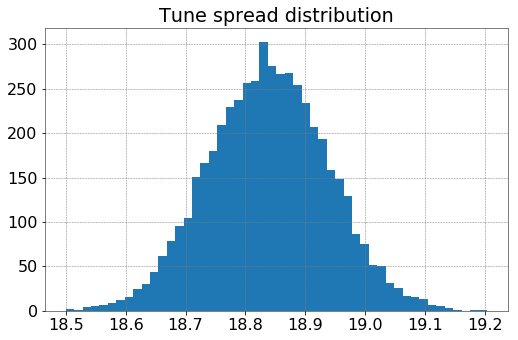

In [155]:
plt.hist(tunes, bins=50)
plt.grid(True)
plt.title('Tune spread distribution')
plt.show()


In [156]:
# Let's construct B matrix
b = list()
for m in range(M):

    Ab = np.sqrt(2*J0*beta)
    phi = 2*np.pi*qb*m/M + phi0  # betatron motion

    x_n = [Ab*np.cos(2*np.pi*q*turn + phi) for q in tunes] # Different particles have different phases and amplitudes, fix
    tmp = np.transpose(x_n)
    x_beta = [np.mean(x) for x in tmp] # averaging through all particles
    
    As = D*delta0
    psi = 2*np.pi*qs*m/M + psi0 
    x_sync = As*np.cos(2*np.pi*qs*turn + psi) # sync motion
    
    
    noise = Ab/100*np.random.rand(N)
    
    x_bpm = x_beta + x_sync + noise
    
    
    b.append(x_bpm)
    


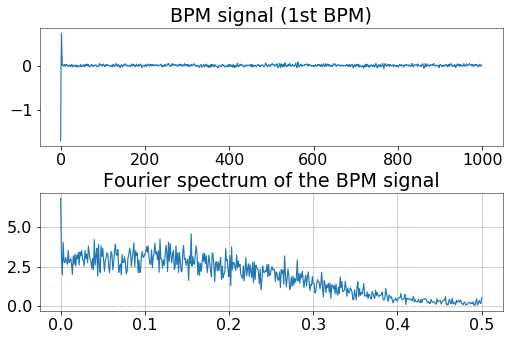

In [157]:
spec_signal = np.abs(np.fft.rfft(b[1]))
q = np.linspace(0,0.5,len(spec_beta)) # tunes array

fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace = 0.4)
axs[0].plot(b[0])
axs[1].plot(q,spec_signal)
axs[0].set_title('BPM signal (1st BPM)')
axs[1].set_title('Fourier spectrum of the BPM signal')
plt.grid(True)

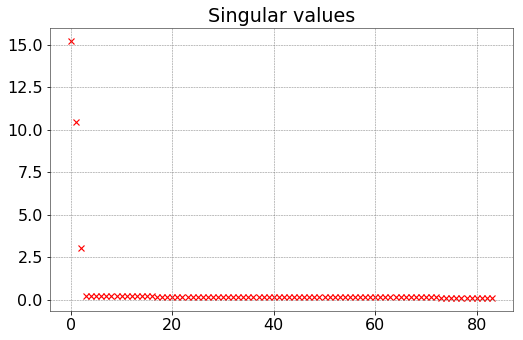

In [158]:
U, s, V = np.linalg.svd(np.transpose(b), full_matrices=True)

plt.scatter(range(M),s, marker='x', color = 'red')
plt.title('Singular values')
plt.grid(True)

In [159]:
u1 = np.transpose(U)
#u1 = U

mode1 = s[0]*u1[0]+s[1]*u1[1]
mode2 = s[2]*u1[2]+s[3]*u1[3]


spec_beta = np.abs(np.fft.rfft(mode1))
spec_sync = np.abs(np.fft.rfft(mode2))

Text(0.5,1,'second mode (sin)')

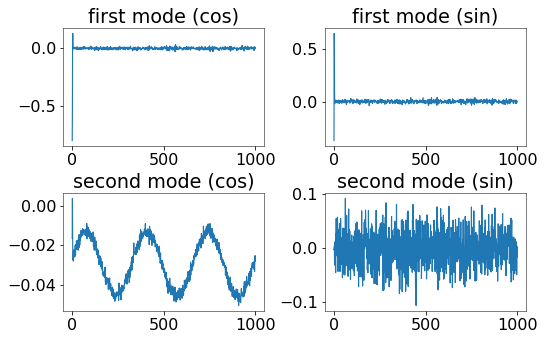

In [160]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.4,wspace = 0.3)
axs[0,0].plot(u1[0])
axs[0,1].plot(u1[1])
axs[1,0].plot(u1[2])
axs[1,1].plot(u1[3])
axs[0,0].set_title('first mode (cos)')
axs[0,1].set_title('first mode (sin)')
axs[1,0].set_title('second mode (cos)')
axs[1,1].set_title('second mode (sin)')

Text(0.5,1,'Fourier spectrum of the 1st and 2nd temporal modes')

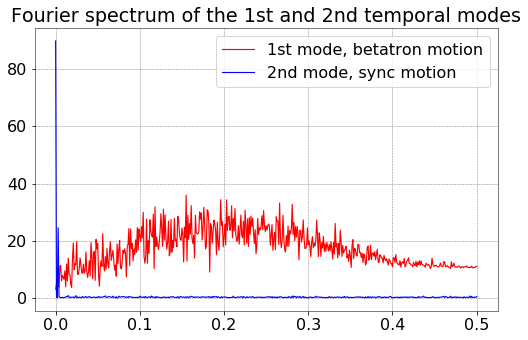

In [161]:
plt.plot(q,spec_beta, color = 'red', label = '1st mode, betatron motion')
plt.plot(q,spec_sync, color = 'blue', label = '2nd mode, sync motion')
plt.legend(loc='best',frameon=True)

plt.grid(True)
plt.title('Fourier spectrum of the 1st and 2nd temporal modes')